# __Titanic dataset exploratory analysis__

##### With this project, I want to learn data analysis approaches using Python and special libraries such as:
* Pandas
* Seaborn
* Matplotlib.pyplot


##### There won't be any specific questions I want to ask this data before getting started. I will explore as many questions as I can during the process. Some of the research may be redundant and not practically useful for a real-case data analysis. However, primarily, this project focuses on working with data visualization tools. Throughout the process, I will enhance my ability to understand and work with data in Python.


### Part #4: Digging deeper

#### __Let's start by importing libraries as usual__

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### __Now, when we've got rid of outliers from [Part #3](https://github.com/cult2rologist/Titanic-Dataset/blob/main/Titanic_Part3.ipynb) we can dig deeper into our data to find out what else we can see__
* As usual, we start from reading our dataset using Pandas
* Cheking result using .head() function

In [165]:
titanic = pd.read_csv('Titanic_cleaned.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### __As we can see above, we have two interesting columns: 'SibSp', which represents Siblings/Spouses, and 'Parch', which represents Parents/Children__
* Let's begin by creating a plot to visualize the count of passengers with siblings and spouses aboard, as well as the count of passengers with parents and children

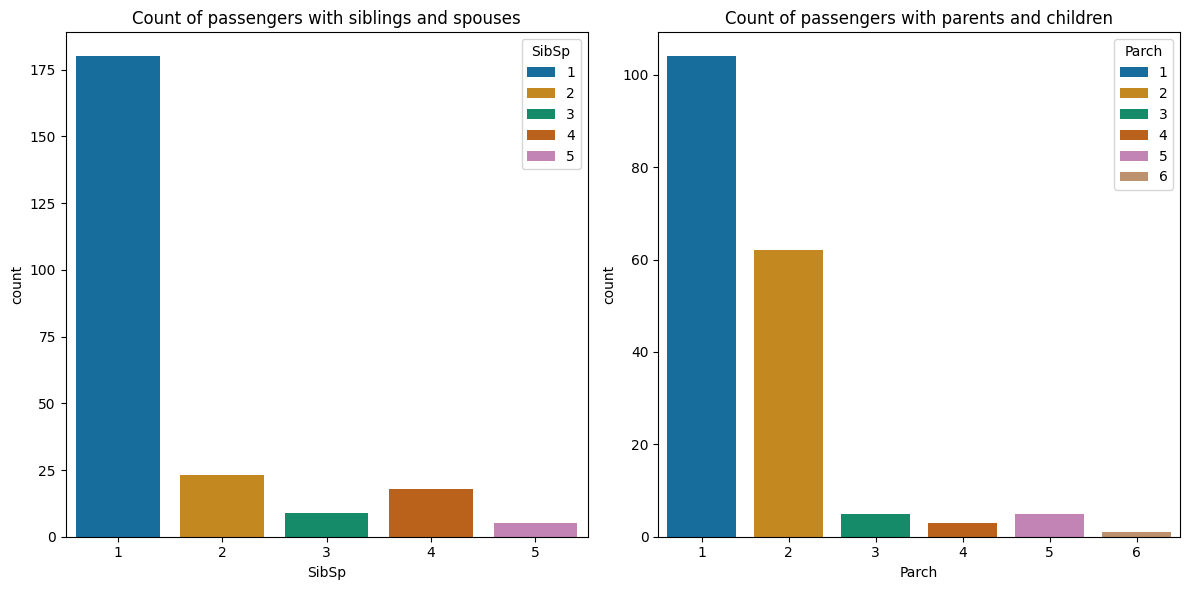

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(ax=axes[0], data=titanic[titanic['SibSp'] > 0], x='SibSp', hue='SibSp', palette='colorblind')
axes[0].set_title('Count of passengers with siblings and spouses')

sns.countplot(ax=axes[1], data=titanic[titanic['Parch'] > 0], x='Parch', hue = 'Parch', palette='colorblind')
axes[1].set_title('Count of passengers with parents and children')

plt.tight_layout()

plt.show()

#### __Now, we would like to determine the number of children on board__
* I asked ChatGPT what the oldest child was, and it responded that the oldest child was 14 years old 
* So, we will use this age to identify all the passengers as children whose age under 15 years old

In [167]:
children = titanic[titanic['Age'] < 15]
children.count()

PassengerId    78
Survived       78
Pclass         78
Name           78
Sex            78
Age            78
SibSp          78
Parch          78
Ticket         78
Fare           78
Cabin          12
Embarked       78
dtype: int64

* Let's visualize the distribution of children and the classes they were traveling in

<Axes: xlabel='Pclass', ylabel='count'>

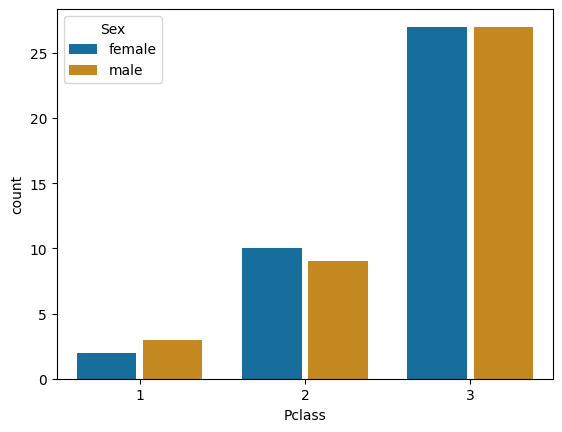

In [168]:
sns.countplot(children, x = 'Pclass', hue = 'Sex', palette = 'colorblind', gap = .1)

* Let's see how the ages of children are distributed across different passenger classes

<Axes: xlabel='Age', ylabel='Count'>

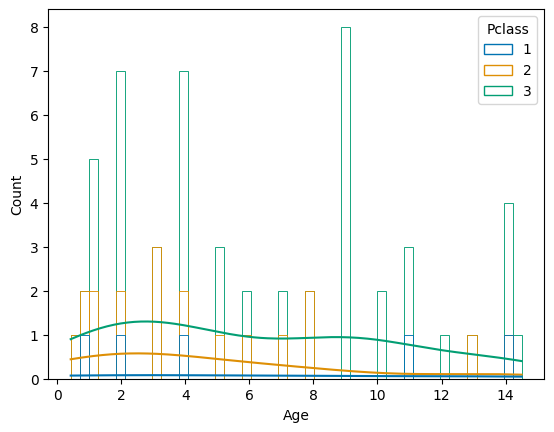

In [169]:
sns.histplot(children, x = 'Age', hue = 'Pclass', palette = 'colorblind', bins = 50, fill = False, kde = True)

#### __Now we know everything about children on board, let's take a look at adults__
* There are two groups of adults: one group has children, and the other doesn't

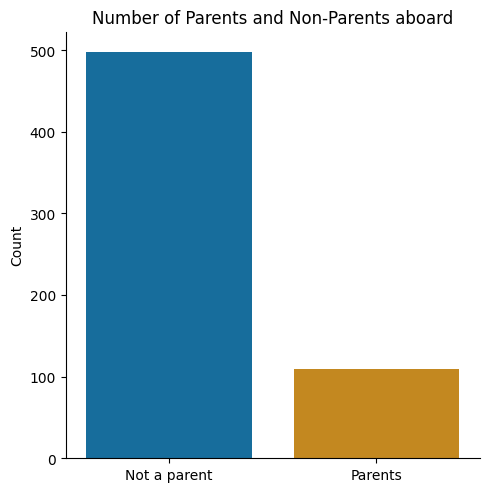

In [194]:
titanic_adults = titanic[titanic['Age'] >= 15].copy()

titanic_adults.loc[:, 'ParchGroup'] = titanic_adults['Parch'].map({0: 'Not a parent', 1: 'Parents', 2: 'Parents', 3: 'Parents', 4: 'Parents', 5: 'Parents', 6: 'Parents'})

sns.catplot(data=titanic_adults, x='ParchGroup', kind='count', hue='ParchGroup', palette='colorblind', legend = False)

plt.xlabel('')
plt.ylabel('Count')
plt.title('Number of Parents and Non-Parents aboard')

plt.show()

* Now, let's find out how many people marked as 'Not a parent' have siblings or spouses and how many are traveling alone

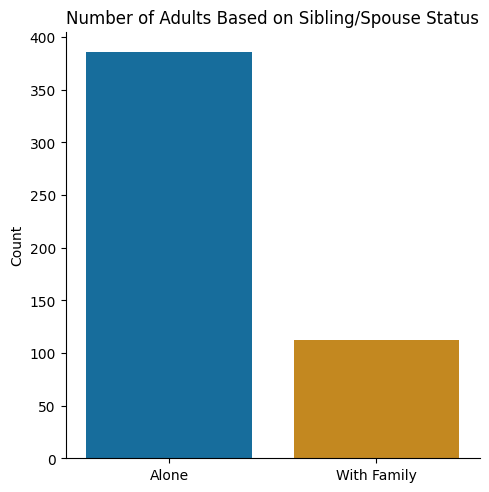

In [209]:
titanic_adults.loc[:, 'SibSpGroup'] = titanic_adults['SibSp'].map({0: 'Alone', 1: 'With Family', 2: 'With Family', 3: 'With Family', 4: 'With Family', 5: 'With Family'})

sns.catplot(data=titanic_adults[titanic_adults['ParchGroup'] != 'Parents'], x='SibSpGroup', kind='count', hue='SibSpGroup', hue_order = ['Alone', 'With Family'], palette='colorblind', legend = False, order = ['Alone', 'With Family'])

plt.xlabel('')
plt.ylabel('Count')
plt.title('Number of Adults Based on Sibling/Spouse Status')

plt.show()

#### __Let's observe the number of passengers based on the cabins they were traveling in__

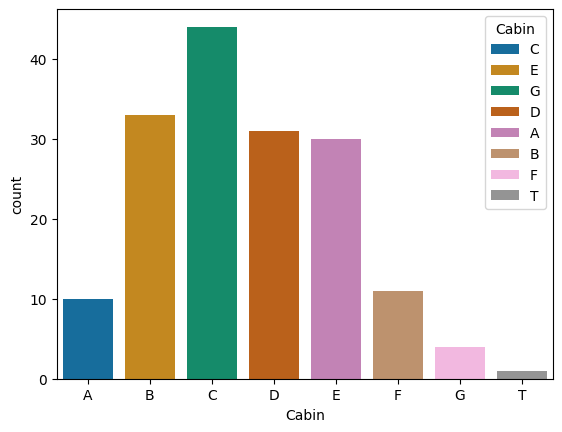

In [170]:
deck = titanic['Cabin'].dropna()

cabins = pd.DataFrame(deck.str[0], columns=['Cabin'])

ax = sns.countplot(data=cabins.sort_values(by='Cabin'), x='Cabin', hue='Cabin', palette='colorblind')

legend_labels = cabins['Cabin'].unique()

ax.legend(title='Cabin', labels=legend_labels)

plt.show()

#### __Or, distribution of cabins across passenger classes__
* I was surprised by the results because I expected each passenger class to have cabins named in a way similar to hotel rooms, where room numbers follow the floor number

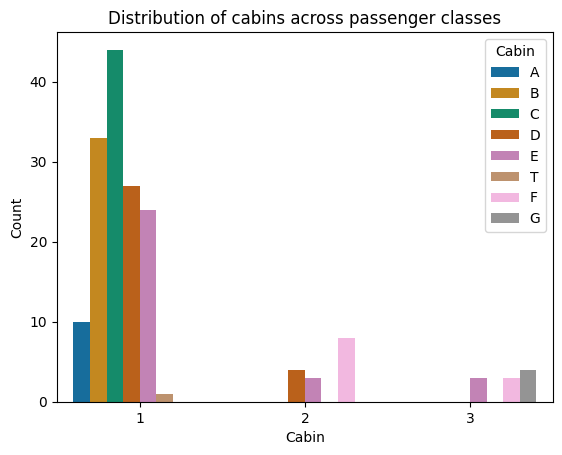

In [171]:
cabins_with_class = pd.concat([cabins, titanic['Pclass']], axis=1)

sns.countplot(data=cabins_with_class.sort_values(by='Cabin'), x='Pclass', hue='Cabin', palette='colorblind')

plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Distribution of cabins across passenger classes')

plt.show()

#### __The [upcoming study](Titanic_Part5.ipynb) will be our final exploration, where we will conclude our investigations and present our key findings__